In [1]:
#import stuff we will need
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#import functions from my .py files
import acquire
import prepare 
import explore 
import evaluate 
import model
#Might needed or might be not 
import wrangle

In [2]:
#acquire our Zillow data from CodeUp server, and turn into .csv
df = acquire.get_zillow_data()

In [3]:
df.head()

,parcelid,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,fips,taxamount
0,14372057,2.0,2.5,1348.0,343967.0,1979.0,6059.0,3628.14
1,13929199,3.0,2.0,1221.0,367034.0,1955.0,6059.0,4589.60
2,12430095,3.0,2.0,1462.0,79713.0,1950.0,6037.0,1269.65
3,13033318,2.0,1.0,768.0,270458.0,1926.0,6037.0,3373.09
4,12079615,4.0,4.0,3696.0,940251.0,1989.0,6037.0,10313.18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52441 entries, 0 to 52440
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      52441 non-null  int64  
 1   bedroomcnt                    52441 non-null  float64
 2   bathroomcnt                   52441 non-null  float64
 3   calculatedfinishedsquarefeet  52359 non-null  float64
 4   taxvaluedollarcnt             52440 non-null  float64
 5   yearbuilt                     52325 non-null  float64
 6   fips                          52441 non-null  float64
 7   taxamount                     52437 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.6 MB


In [5]:
#Using wrangle to get null-values check function
wrangle.miss_dup_values(df)

Your selected dataframe has 8 columns.
There are 4 columns that have missing values.
  
** There are 121 duplicate rows that represents 0.23% of total Values**


,Missing Values,% of Total Values
yearbuilt,116,0.2
calculatedfinishedsquarefeet,82,0.2
taxamount,4,0.0
taxvaluedollarcnt,1,0.0


In [6]:
#Using clean function from prepare
df = prepare.clean_zillow(df)

In [7]:
#Check again after cleanning
wrangle.miss_dup_values(df)

Your selected dataframe has 8 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52196 entries, 0 to 52440
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   parcel_id        52196 non-null  object 
 1   number_bedroom   52196 non-null  float64
 2   number_bathroom  52196 non-null  float64
 3   sqft             52196 non-null  float64
 4   tax_value        52196 non-null  float64
 5   yearbuilt        52196 non-null  float64
 6   geographic_code  52196 non-null  int64  
 7   tax_amount       52196 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.6+ MB


In [9]:
prepare.unique_cntvalues(df, 30)

************************** COUNT OF UNIQUE VALUES ************************** 
Columns
 
parcel_id --> 52196 unique values
 
number_bedroom --> 14 unique values
 
number_bathroom --> 22 unique values
 
sqft --> 4720 unique values
 
tax_value --> 38846 unique values
 
yearbuilt --> 133 unique values
 
geographic_code --> 3 unique values
 
tax_amount --> 50722 unique values
 
 **************************  UNIQUE VALUES **************************
 
Uniques values of all the columns that have less than 30 unique values 
 
number_bedroom
0.0        57
1.0       604
2.0      8310
3.0     23290
4.0     15196
5.0      3964
6.0       632
7.0       106
8.0        24
9.0         8
10.0        2
11.0        1
12.0        1
14.0        1
Name: number_bedroom, dtype: int64
--------------------------- 
 
number_bathroom
0.0        41
1.0      9520
1.5       838
2.0     21834
2.5      3929
3.0     10641
3.5       911
4.0      2225
4.5       681
5.0       803
5.5       224
6.0       320
6.5        47
7.0

In [10]:
#Total of 25 properties with zero bedroom and bathroom
#We will keep these for now and check later if want to drop it
df[(df.number_bedroom == 0) & (df.number_bathroom == 0)]

,parcel_id,number_bedroom,number_bathroom,sqft,tax_value,yearbuilt,geographic_code,tax_amount
3036,12146026,0.0,0.0,280.0,963472.0,1953.0,6037,11016.31
3241,12227894,0.0,0.0,1208.0,185161.0,1990.0,6037,2558.37
4884,12664381,0.0,0.0,128.0,49859.0,1949.0,6037,849.72
10887,14121842,0.0,0.0,1454.0,151824.0,1912.0,6059,2397.46
14782,13841412,0.0,0.0,1567.0,226597.0,1914.0,6059,3004.76
15685,11953654,0.0,0.0,812.0,22102.0,1924.0,6037,387.66
18657,11712886,0.0,0.0,3087.0,631299.0,1947.0,6037,7731.90
20047,11266326,0.0,0.0,400.0,49627.0,1950.0,6037,703.30
20516,12038635,0.0,0.0,554.0,440000.0,1927.0,6037,5333.15
23674,14507431,0.0,0.0,4184.0,1145602.0,1964.0,6059,11761.22


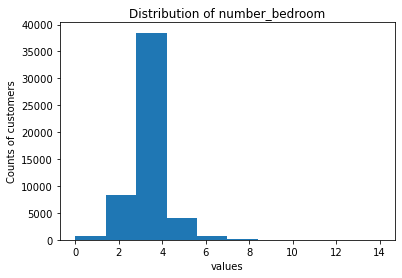

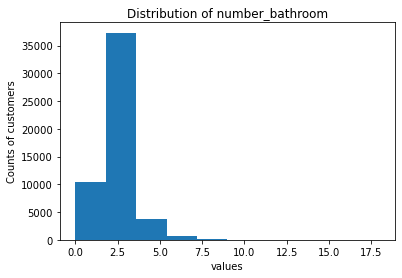

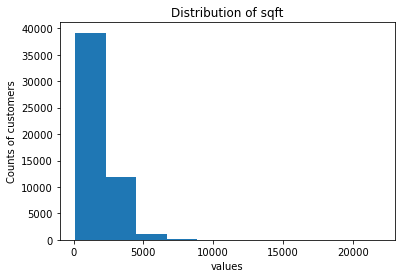

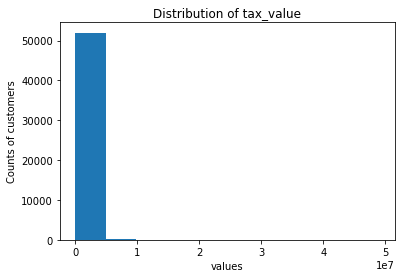

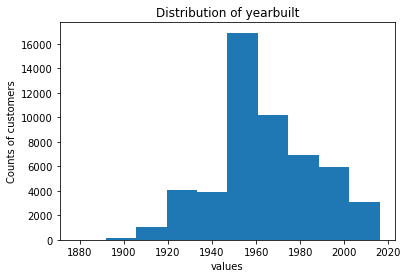

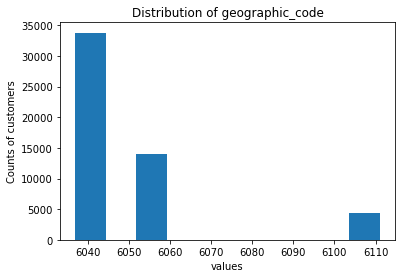

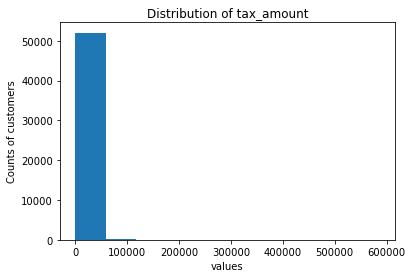

In [11]:
prepare.distribution(df)

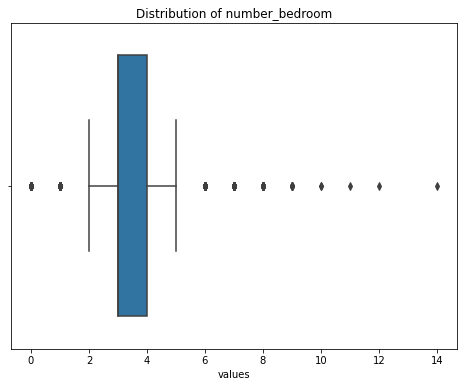

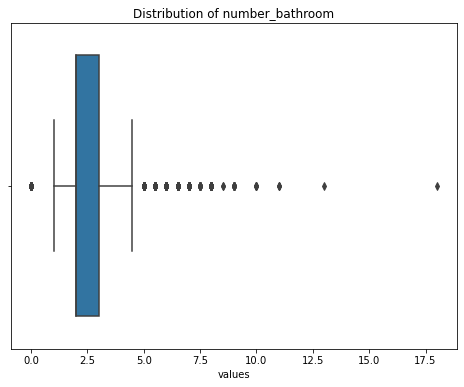

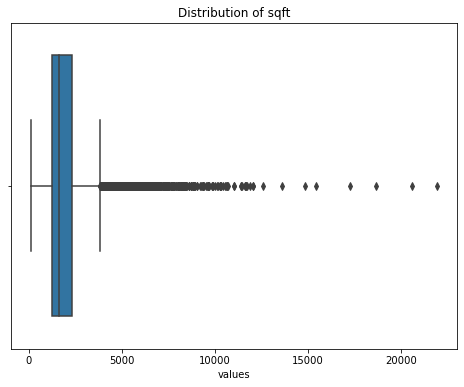

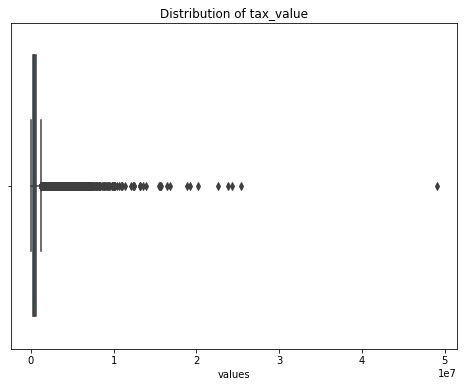

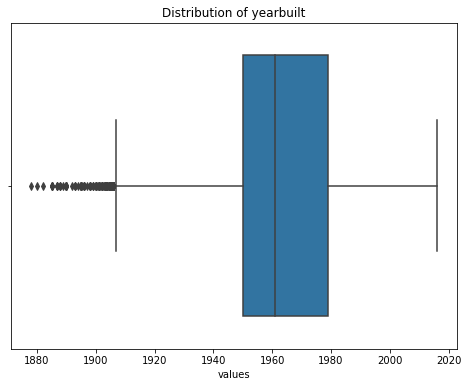

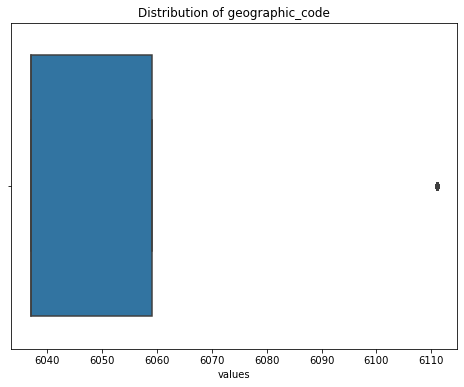

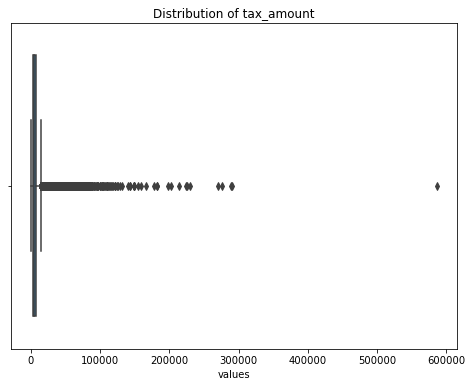

In [12]:
prepare.distribution_boxplot(df)

- Takeaways

    - number_bedroom, number_bathroom, sqft and tax_amount are continous.
    - our target is tax_value

- Clean data
    - Drop duplicates
    - Drop nulls
    - Change 'parcelid' to a string type
    - Rename columns